In [ ]:
# Import required python packages (libraries)
import pandas as pd              # Data I/O, analysis, and manipulation
import numpy as np               # Scientific calculations 
import matplotlib.pyplot as plt  # Visualization

In [ ]:
# Download Daily Sea Ice Extent dataset from the NSIDC
!wget https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv

--2021-10-20 06:39:57--  https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv
Resolving masie_web.apps.nsidc.org (masie_web.apps.nsidc.org)... 128.138.135.43
Connecting to masie_web.apps.nsidc.org (masie_web.apps.nsidc.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596218 (1.5M) [text/csv]
Saving to: ‘N_seaice_extent_daily_v3.0.csv’

N_seaice_extent_dai 100%[===================>]   1.52M  1.77MB/s    in 0.9s    

2021-10-20 06:39:58 (1.77 MB/s) - ‘N_seaice_extent_daily_v3.0.csv’ saved [1596218/1596218]



In [ ]:
# Path to the dataset file
dataset_src = 'N_seaice_extent_daily_v3.0.csv'

# Import the csv dataset as pandas Dataframe
sea_ice_daily = pd.read_csv(
    dataset_src,                                # 'path/to/the/dataset.csv'
    sep=',',                                    # Delimiter to use
    skipinitialspace=True,                      # Skip spaces after delimiter      
    header=0,                                   # Row to use as the column names
    skiprows=[1],                               # Line numbers to skip (0-indexed)
    usecols=['Year', 'Month', 'Day', 'Extent'], # Return a subset of the columns
    dtype={'Year': int, 'Month': int, 
           'Day': int, 'Extent': float}         # Data type for data in columns
)                
# Create annual mean dataset of the sea ice extent from the daily data
sea_ice_annual = sea_ice_daily.groupby(sea_ice_daily.Year, as_index=False)['Extent'].mean()[1:-1]


In [ ]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
# Fit the linear regression model
linear_model = regression.fit(
    sea_ice_annual.index[:,np.newaxis],
    sea_ice_annual.Extent)
# Print the model params
print(linear_model.intercept_, linear_model.coef_)
# Predict sea ice extent
sea_ice_extent_hat_lr = linear_model.predict(sea_ice_annual.index[:,np.newaxis])

12.526573160717437 [-0.054084]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


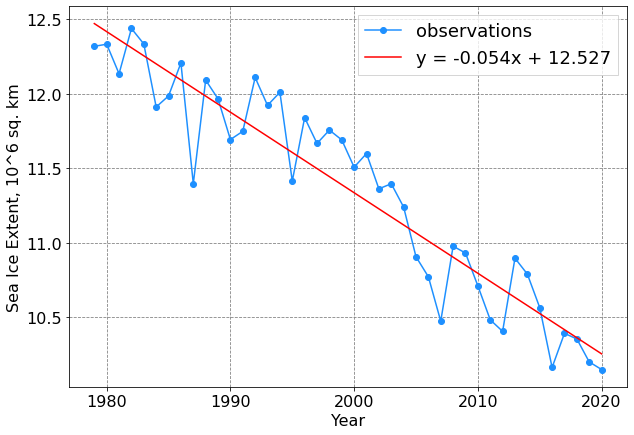

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')

ax.plot(
    sea_ice_annual.Year.values,
    sea_ice_annual.Extent.values,
    c='dodgerblue', marker='o', label='observations'
)
ax.plot(sea_ice_annual.Year.values, 
        sea_ice_extent_hat_lr,
        c='red', label='y = %.3fx + %.3f' % (linear_model.coef_, linear_model.intercept_))

ax.legend(fontsize=18, fancybox=False)
plt.show()

# 2. Generate a dataset with several features

## 2.1 Import and preprocess datasets


*   North Atlantic Oscillation (NAO). [**Source**](https://www.ncdc.noaa.gov/teleconnections/nao/)
*   Arctic Oscillation (AO). [**Source**](https://www.ncdc.noaa.gov/teleconnections/ao/) 
*   Average SST above $70^\circ N$ from NOAA NCEP EMC CMB. [**Source**](http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.EMC/.CMB/.GLOBAL/.Reyn_SmithOIv2/.monthly/.sst/) 

Preprocessing steps: 


1.   Download the data from the ftp server 
2.   Import data using the `pandas` library and calculate **annual** mean timeseries from the **monthly** data 
3.   Merge the datasets




In [ ]:
# Download the data
!wget ftp://ftp.nersc.no/pub/ml_course/NAO.csv

# Import monthly NAO dataset 
nao_monthly = pd.read_csv('NAO.csv', skiprows=[0])
# Extract years 
nao_monthly['Year'] = pd.to_datetime(nao_monthly.Date, format='%Y%m').dt.year
# Average by year
nao_annual = nao_monthly.groupby(nao_monthly.Year, as_index=True)['Value'].mean()

--2021-10-20 06:53:34--  ftp://ftp.nersc.no/pub/ml_course/NAO.csv
           => ‘NAO.csv’
Resolving ftp.nersc.no (ftp.nersc.no)... 158.37.60.245
Connecting to ftp.nersc.no (ftp.nersc.no)|158.37.60.245|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/ml_course ... done.
==> SIZE NAO.csv ... 10795
==> PASV ... done.    ==> RETR NAO.csv ... done.
Length: 10795 (11K) (unauthoritative)

NAO.csv             100%[===================>]  10.54K  --.-KB/s    in 0s      

2021-10-20 06:53:38 (190 MB/s) - ‘NAO.csv’ saved [10795]



In [ ]:
# Download the data
!wget ftp://ftp.nersc.no/pub/ml_course/AO.csv  

# Import monthly AO dataset 
ao_monthly = pd.read_csv('AO.csv', skiprows=[0])
ao_monthly['Year'] = pd.to_datetime(ao_monthly.Date, format='%Y%m').dt.year
ao_annual = ao_monthly.groupby(ao_monthly.Year, as_index=True)['Value'].mean()

--2021-10-20 06:53:08--  ftp://ftp.nersc.no/pub/ml_course/AO.csv
           => ‘AO.csv’
Resolving ftp.nersc.no (ftp.nersc.no)... 158.37.60.245
Connecting to ftp.nersc.no (ftp.nersc.no)|158.37.60.245|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/ml_course ... done.
==> SIZE AO.csv ... 11686
==> PASV ... done.    ==> RETR AO.csv ... done.
Length: 11686 (11K) (unauthoritative)

AO.csv              100%[===================>]  11.41K  --.-KB/s    in 0s      

2021-10-20 06:53:12 (123 MB/s) - ‘AO.csv’ saved [11686]



In [ ]:
# Download the data
!wget ftp://ftp.nersc.no/pub/ml_course/SST.csv  

# Import monthly SST dataset 
sst_monthly = pd.read_csv('SST.csv',skiprows=[0, 1], sep='\s+', 
                          names=['Month', 'Year', 'SST'], usecols=['Year', 'SST'])
sst_annual = sst_monthly.groupby(sst_monthly.Year, as_index=True)['SST'].mean()

--2021-10-20 06:54:10--  ftp://ftp.nersc.no/pub/ml_course/SST.csv
           => ‘SST.csv’
Resolving ftp.nersc.no (ftp.nersc.no)... 158.37.60.245
Connecting to ftp.nersc.no (ftp.nersc.no)|158.37.60.245|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/ml_course ... done.
==> SIZE SST.csv ... 10003
==> PASV ... done.    ==> RETR SST.csv ... done.
Length: 10003 (9.8K) (unauthoritative)

SST.csv             100%[===================>]   9.77K  --.-KB/s    in 0s      

2021-10-20 06:54:14 (147 MB/s) - ‘SST.csv’ saved [10003]



## 2.2 Merge the dataset

In [ ]:
# Generate a joint dataset
dataset = sea_ice_annual.copy().set_index('Year')
dataset = dataset.join(nao_annual.rename('NAO')).join(ao_annual.rename('AO')).join(sst_annual)

In [ ]:
dataset

,Extent,NAO,AO,SST
Year,,,,
1979,12.319560,0.135000,-0.365167,NaN
1980,12.334148,-0.412500,-0.643250,NaN
1981,12.135486,-0.212500,-0.434583,NaN
1982,12.439445,0.430000,0.297667,12.199422
1983,12.335896,0.310000,0.031917,12.307427
1984,11.912601,0.247500,-0.191667,12.224056
1985,11.986599,-0.183333,-0.519167,12.185344
1986,12.208224,0.503333,0.084833,12.201943
1987,11.397227,-0.122500,-0.544167,12.304513


In [ ]:
# Drop NaN values
dataset = dataset.dropna(axis=0)

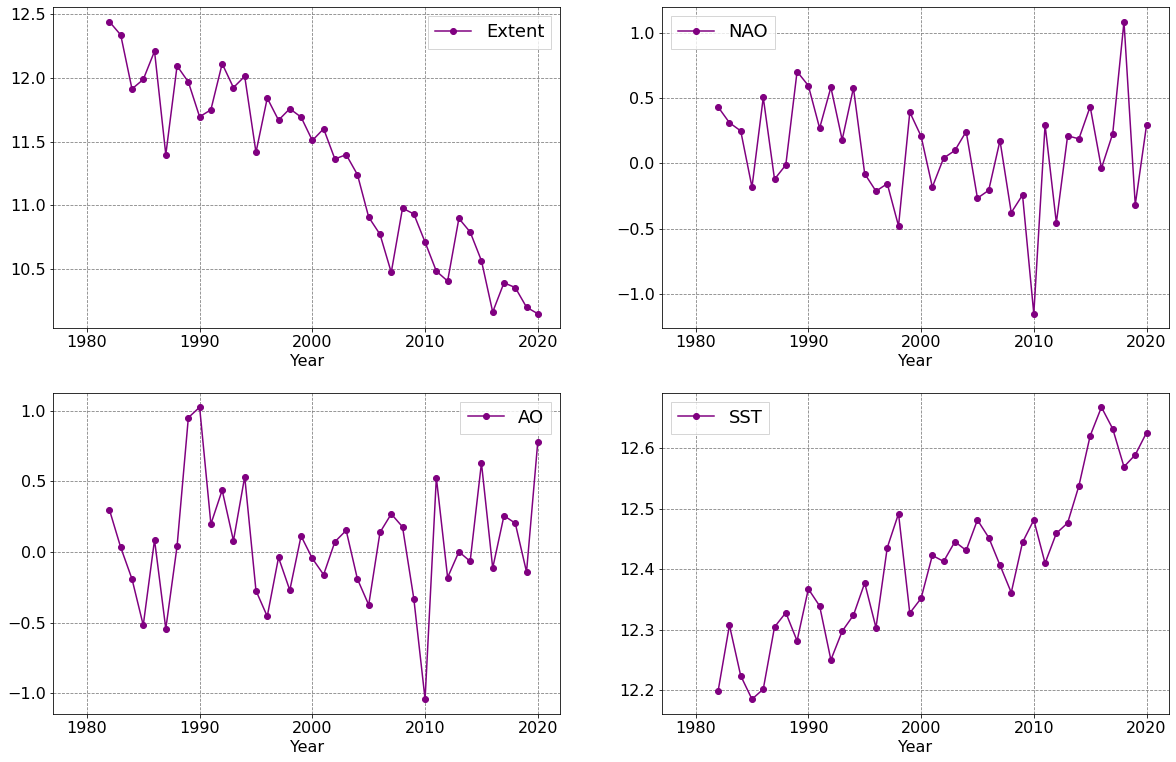

In [ ]:
# Plot data
fig, ax = plt.subplots(2, 2, figsize=(20, 13))
ax = ax.flatten()

i = 0
for i, feature_name in enumerate(dataset.columns):
    ax[i].plot(dataset.index,
               dataset[feature_name].values,
               c='purple', marker='o', label=feature_name)
    ax[i].legend(fontsize=18, fancybox=False)
    ax[i].grid(ls='--', color='grey')
    ax[i].tick_params(labelsize=16)
    ax[i].set_xticks(np.arange(1980, 2021, 10))
    ax[i].set_xlim((1977, 2022))
    ax[i].set_xlabel('Year', fontsize=16)

# 3. Split training and testing dataset

In [ ]:
# Set number of years used for the validation
n_test_data = 10
# Split the dataset for training and testing
train_data = dataset[:-n_test_data]
test_data = dataset[-n_test_data:]

# For more information see:  https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

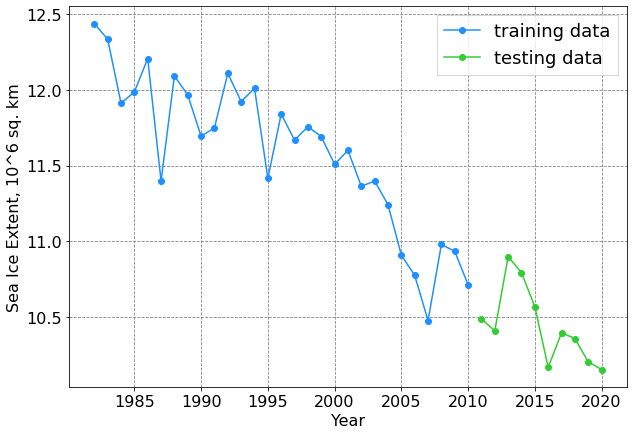

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')

ax.plot(train_data.index,
        train_data.Extent.values,
        c='dodgerblue', marker='o', label='training data')

ax.plot(test_data.index,
        test_data.Extent.values,
        c='limegreen', marker='o', label='testing data')

ax.legend(fontsize=18, fancybox=False)
plt.show()

# 4. Multiple linear regression

In [ ]:
# Specify number of features to use
features = ['SST', 'AO']
# Train linear regression using all provided features 
reg = LinearRegression().fit(train_data[features].values, train_data.Extent.values)
# Print model coefs.
print(reg.coef_)

[-3.98293203  0.17845785]


In [ ]:
# for more metrics visit https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import mean_squared_error
# Predict the sea ice extent for the test data
sea_ice_extent_hat_mlr = reg.predict(test_data[features].values)
# Calculate MSE based on the test data
print(mean_squared_error(sea_ice_extent_hat_mlr, test_data.Extent.values))

0.2148303184842863


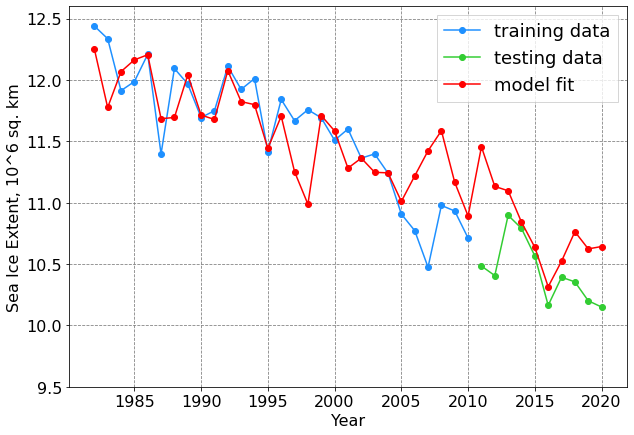

In [ ]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')

ax.plot(train_data.index,
        train_data.Extent.values,
        c='dodgerblue', marker='o', label='training data')

ax.plot(test_data.index,
        test_data.Extent.values,
        c='limegreen', marker='o', label='testing data',)

ax.plot(dataset.index,
        reg.predict(dataset[features].values),
        c='red', marker='o', label='model fit',)

ax.legend(fontsize=18, fancybox=False)
ax.set_ylim([9.5, 12.6])

plt.show()

# 5. Multiple *polynomial* regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Specify number of features to use
features = ['NAO', 'SST', 'AO']

# Set the degree of the polynomial
poly_degree = 2

# Train the MPR model
poly_reg = PolynomialFeatures(degree=poly_degree)
poly_features = poly_reg.fit_transform(train_data[features].values)
poly_reg.fit(poly_features,train_data.Extent.values)

poly_reg_model=LinearRegression().fit(
    poly_features,
    train_data.Extent.values
)

In [ ]:
# Predict the sea ice extent for test data
test_extent_hat_mpr = poly_reg_model.predict(poly_reg.fit_transform(test_data[features].values))
# Calculate the MSE based on test data
print('Mean Squared Error')
print(mean_squared_error(test_extent_hat_mpr, test_data.Extent.values))

Mean Squared Error
0.4571379860297925


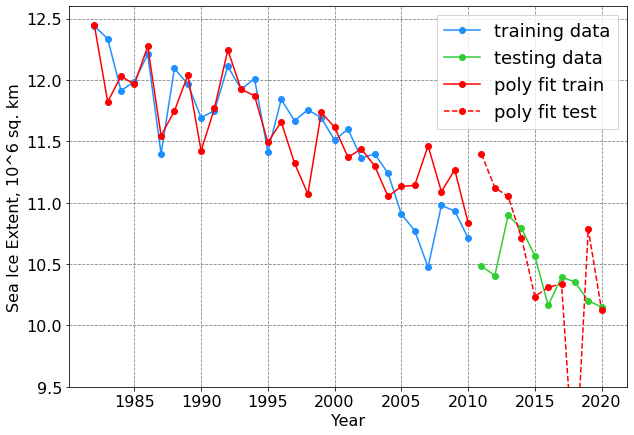

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')

ax.plot(train_data.index,
        train_data.Extent.values,
        c='dodgerblue', marker='o', label='training data')

ax.plot(test_data.index,
        test_data.Extent.values,
        c='limegreen', marker='o', label='testing data',)

ax.plot(train_data.index,
        poly_reg_model.predict(poly_reg.fit_transform(train_data[features].values)),
        c='red', marker='o', label='poly fit train',)

ax.plot(test_data.index,
        poly_reg_model.predict(poly_reg.fit_transform(test_data[features].values)),
        c='red', marker='o', label='poly fit test', ls='--')

ax.legend(fontsize=18, fancybox=False)
ax.set_ylim([9.5, 12.6])
plt.show()

# 6. Ridge regularization

In [ ]:
from sklearn.linear_model import Ridge

features = ['NAO', 'SST', 'AO']
regularization_coeff = 25
poly_degree = 3

# Prepare the features
poly_reg = PolynomialFeatures(degree=poly_degree)
poly_features = poly_reg.fit_transform(train_data[features].values)
poly_reg.fit(poly_features, train_data.Extent.values)
# Train the model 
rig_poly_regression = Ridge(alpha=regularization_coeff).fit(poly_features, train_data.Extent.values)

In [ ]:
# Predict the sea ice extent for the test data
test_extent_hat_rmlr = rig_poly_regression.predict(poly_reg.fit_transform(test_data[features].values))
# Calculate MSE based on the test data
print(mean_squared_error(test_extent_hat_rmlr, test_data.Extent.values))

0.2946576394803804


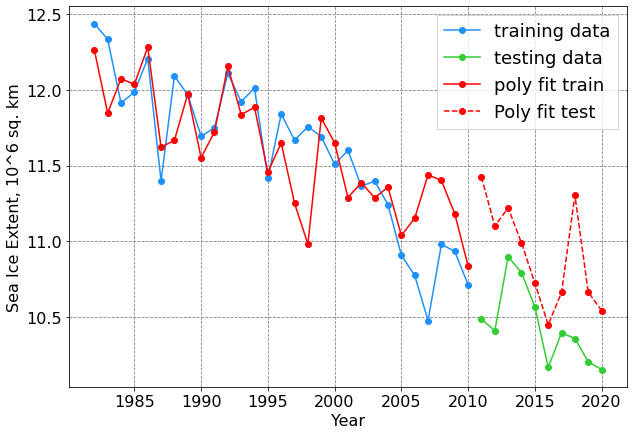

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')

ax.plot(train_data.index,
        train_data.Extent.values,
        c='dodgerblue', marker='o', label='training data')

ax.plot(test_data.index,
        test_data.Extent.values,
        c='limegreen', marker='o', label='testing data',)

ax.plot(train_data.index,
        rig_poly_regression.predict(poly_reg.fit_transform(train_data[features].values)),
        c='red', marker='o', label='poly fit train',)

ax.plot(test_data.index,
        rig_poly_regression.predict(poly_reg.fit_transform(test_data[features].values)),
        c='red', marker='o', label='Poly fit test', ls='--')

ax.legend(fontsize=18, fancybox=False)
plt.show()

# Lasso regularization

In [ ]:
from sklearn.linear_model import Lasso

features = ['NAO', 'SST']
regularization_coeff = 5
poly_degree = 4

# Prepare the features
poly_reg = PolynomialFeatures(degree=poly_degree)
poly_features = poly_reg.fit_transform(train_data[features].values)
poly_reg.fit(poly_features, train_data.Extent.values)
# Train the model 
las_poly_regression = Lasso(alpha=regularization_coeff).fit(poly_features, train_data.Extent.values)

In [ ]:
# Predict the sea ice extent for the test data
test_extent_hat_lmlr = las_poly_regression.predict(poly_reg.fit_transform(test_data[features].values))
# Calculate MSE based on the test data
print(mean_squared_error(test_extent_hat_lmlr, test_data.Extent.values))

0.28433980993240815


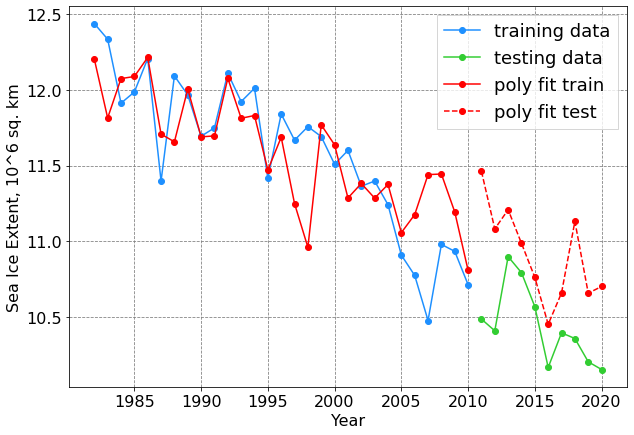

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')

ax.plot(train_data.index,
        train_data.Extent.values,
        c='dodgerblue', marker='o', label='training data')

ax.plot(test_data.index,
        test_data.Extent.values,
        c='limegreen', marker='o', label='testing data',)

ax.plot(train_data.index,
        las_poly_regression.predict(poly_reg.fit_transform(train_data[features].values)),
        c='red', marker='o', label='poly fit train',)

ax.plot(test_data.index,
        las_poly_regression.predict(poly_reg.fit_transform(test_data[features].values)),
        c='red', marker='o', label='poly fit test', ls='--')

ax.legend(fontsize=18, fancybox=False)
plt.show()